# CDNow Analysis

CDNow网站用户消费数据分析

---

Created on 2019-05-27

Update on 2019-05-29

Author: Jiacheng

Github: https://github.com/Jiachengciel/Data_Analysis

---

## 一. 环境配置

In [137]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib notebook
sns.set(style='white', context='notebook', 
        palette='deep', rc={'figure.figsize':(5,5)})

---

## 二. 数据处理

### 2.1 数据导入

In [263]:
names = ['ID', 'Order_Date', 'Quantity', 'Amount']
Data = pd.read_csv('CDNow.txt', names=names, sep='\s+', header=None)
Data.Order_Date = pd.to_datetime(Data.Order_Date.astype(str))
print("订单总额: ", len(Data))

订单总额:  69659


### 2.2 部分数据查看

In [264]:
Data[:10]

,ID,Order_Date,Quantity,Amount
0,1,1997-01-01,1,11.77
1,2,1997-01-12,1,12.00
2,2,1997-01-12,5,77.00
3,3,1997-01-02,2,20.76
4,3,1997-03-30,2,20.76
5,3,1997-04-02,2,19.54
6,3,1997-11-15,5,57.45
7,3,1997-11-25,4,20.96
8,3,1998-05-28,1,16.99
9,4,1997-01-01,2,29.33


### 2.3 检查数据缺失

In [140]:
Data.isnull().any().describe()

count         4
unique        1
top       False
freq          4
dtype: object

---

## 三. 商品销售分析

主要分析`商品数量`、`商品金额`等方面

### 3.1 静态分析

从各订单`购买数量`和各订单`购买金额`分析

* ### 3.1.1各订单购买数量 

In [5]:
Data.Quantity.describe()

count    69659.000000
mean         2.410040
std          2.333924
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         99.000000
Name: Quantity, dtype: float64

#### 分析：

订单总计`69659`个

每笔订单平均购买`2.4`个产品，标准差为`2.33`

每笔订单最少购买`1`个产品， 最多购买`99`个产品

<IPython.core.display.Javascript object>


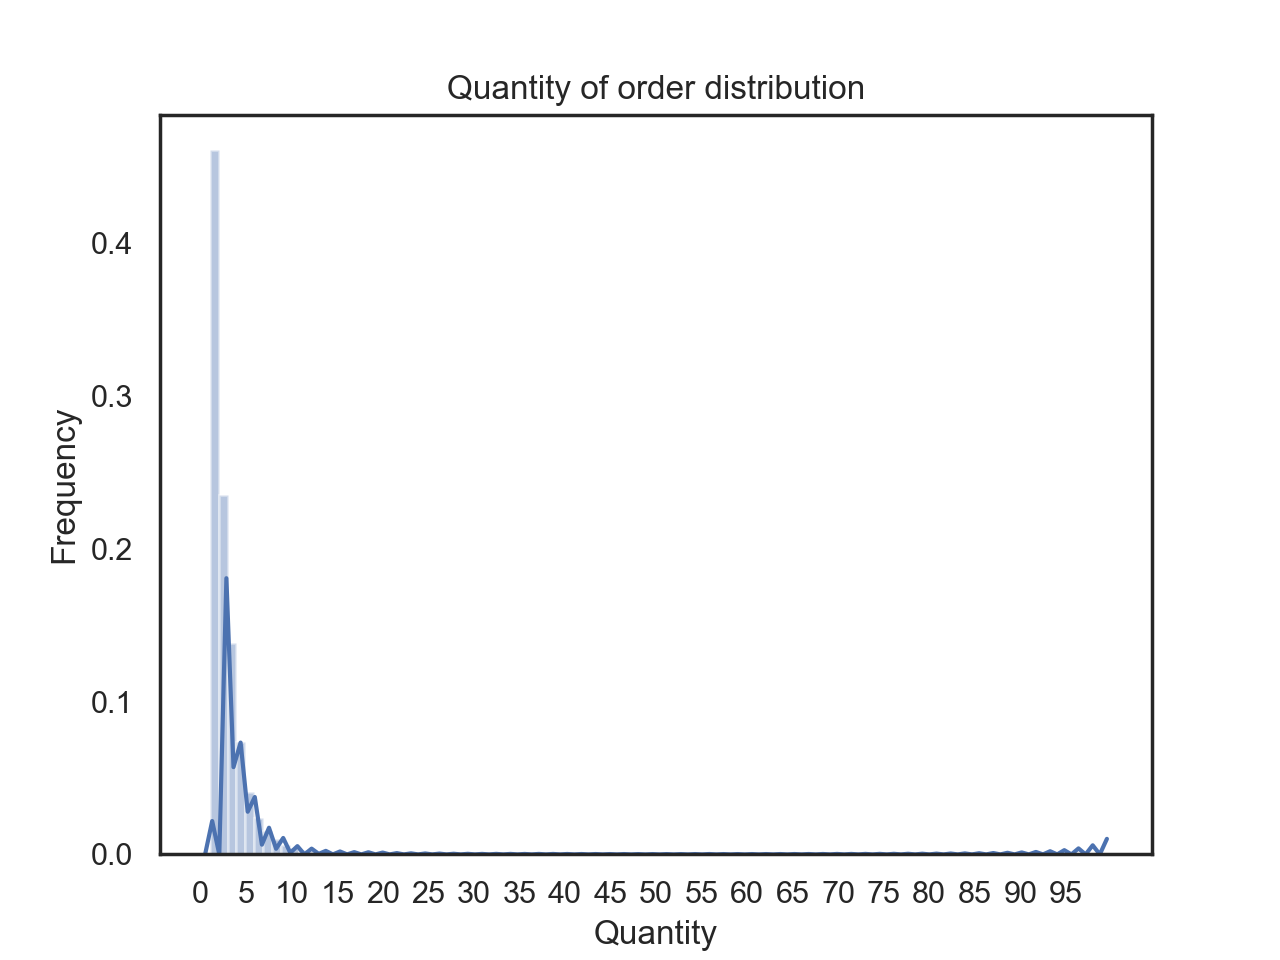

In [37]:
# 可视化
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Quantity of order distribution")
plt.xlabel("Quantity of order")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 100, 5))
sns.distplot(Data.Quantity, bins=100, kde=True)
plt.show()

#### 分析： 

各订单数量`总体较小`，大部分订单数量`<5`

* ### 3.1.2 各订单购买金额分析

In [24]:
Data.Amount.describe()

count    69659.000000
mean        35.893648
std         36.281942
min          0.000000
25%         14.490000
50%         25.980000
75%         43.700000
max       1286.010000
Name: Amount, dtype: float64

#### 分析：

每笔订单平均支付`35.89$`， 标准差为`36.28`, 50%订单`<25.98$`

每笔订单购买金额最少为`0`， 最高为`1286.01`

因此，订单存在`取消`的情况

<IPython.core.display.Javascript object>


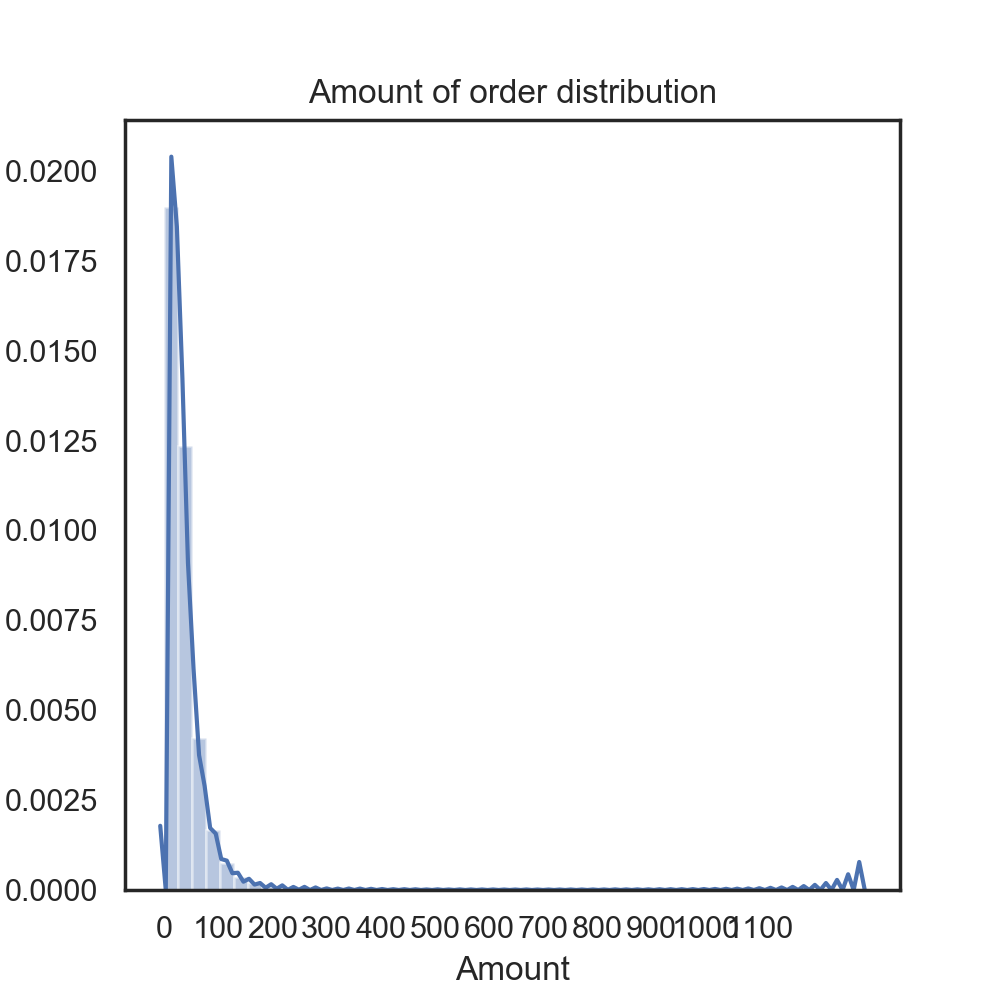

In [44]:
# 可视化
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Amount of order distribution")
plt.xlabel("Amount of order")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 1200, 100))
sns.distplot(Data.Amount, kde=True)
plt.show()

#### 分析：

各订单购买金额较为集中于`0～100$`范围内

---

### 3.2 动态分析 

主要从订单的`数量`和`购买金额`趋势进行分析，同时`检测异常值`

### 3.2.1 订单数量趋势分析

In [45]:
# 数据整合
df_quantity = pd.DataFrame(Data.groupby(['Order_Date'])['Quantity'].sum())
df_quantity = df_quantity.reset_index()
df_quantity[:10]


,Order_Date,Quantity
0,1997-01-01,494
1,1997-01-02,530
2,1997-01-03,495
3,1997-01-04,404
4,1997-01-05,590
5,1997-01-06,620
6,1997-01-07,494
7,1997-01-08,515
8,1997-01-09,482
9,1997-01-10,533


<IPython.core.display.Javascript object>


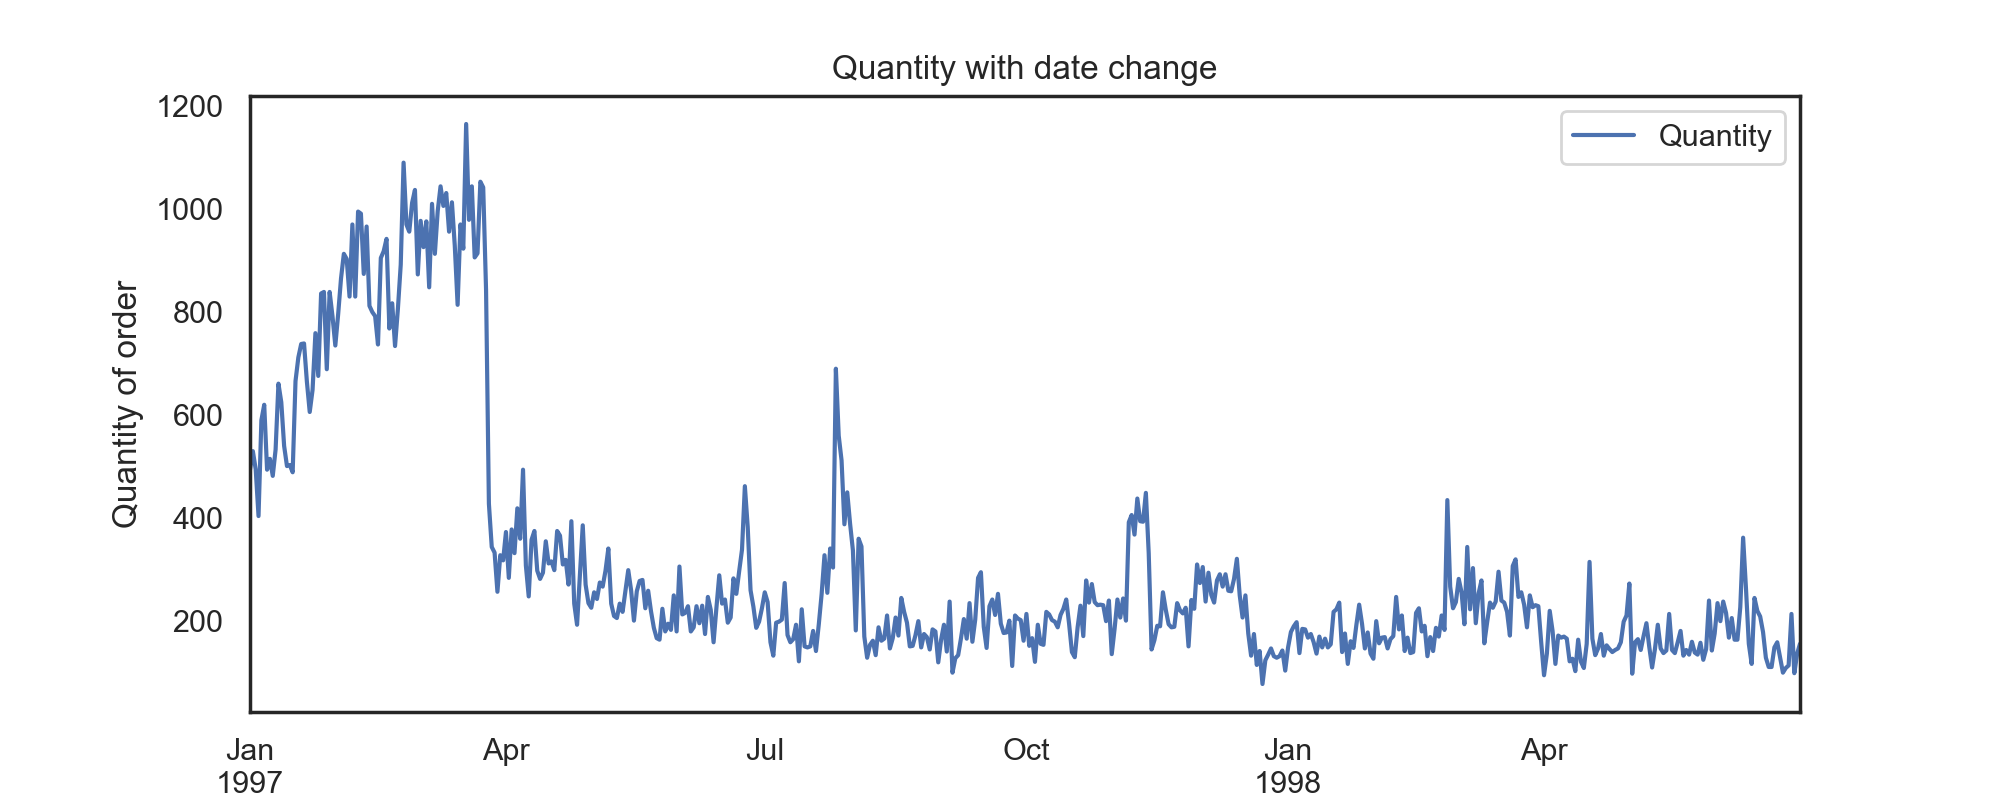

In [53]:
# 可视化
df_quantity.set_index('Order_Date').plot(figsize=(10,4))
plt.title("Quantity with date change")
plt.ylabel("Quantity of order")
plt.show()

#### 分析：

订单数量在 `1997-01 到 1997-04` 总体呈`上升`趋势，且订单数量 `较高`

订单数量在`1997-04`呈峭壁式下滑

之后，订单数量有`小幅度波动`，但基本稳定在`200个/天`

### 3.2.2 订单金额趋势分析

In [54]:
# 数据整合
df_amount = pd.DataFrame(Data.groupby(['Order_Date'])['Amount'].sum())
df_amount = df_amount.reset_index()
df_amount[:10]

,Order_Date,Amount
0,1997-01-01,7515.35
1,1997-01-02,8025.95
2,1997-01-03,7475.04
3,1997-01-04,6722.93
4,1997-01-05,9274.80
5,1997-01-06,9680.55
6,1997-01-07,7741.19
7,1997-01-08,7963.14
8,1997-01-09,7534.92
9,1997-01-10,8348.59


<IPython.core.display.Javascript object>


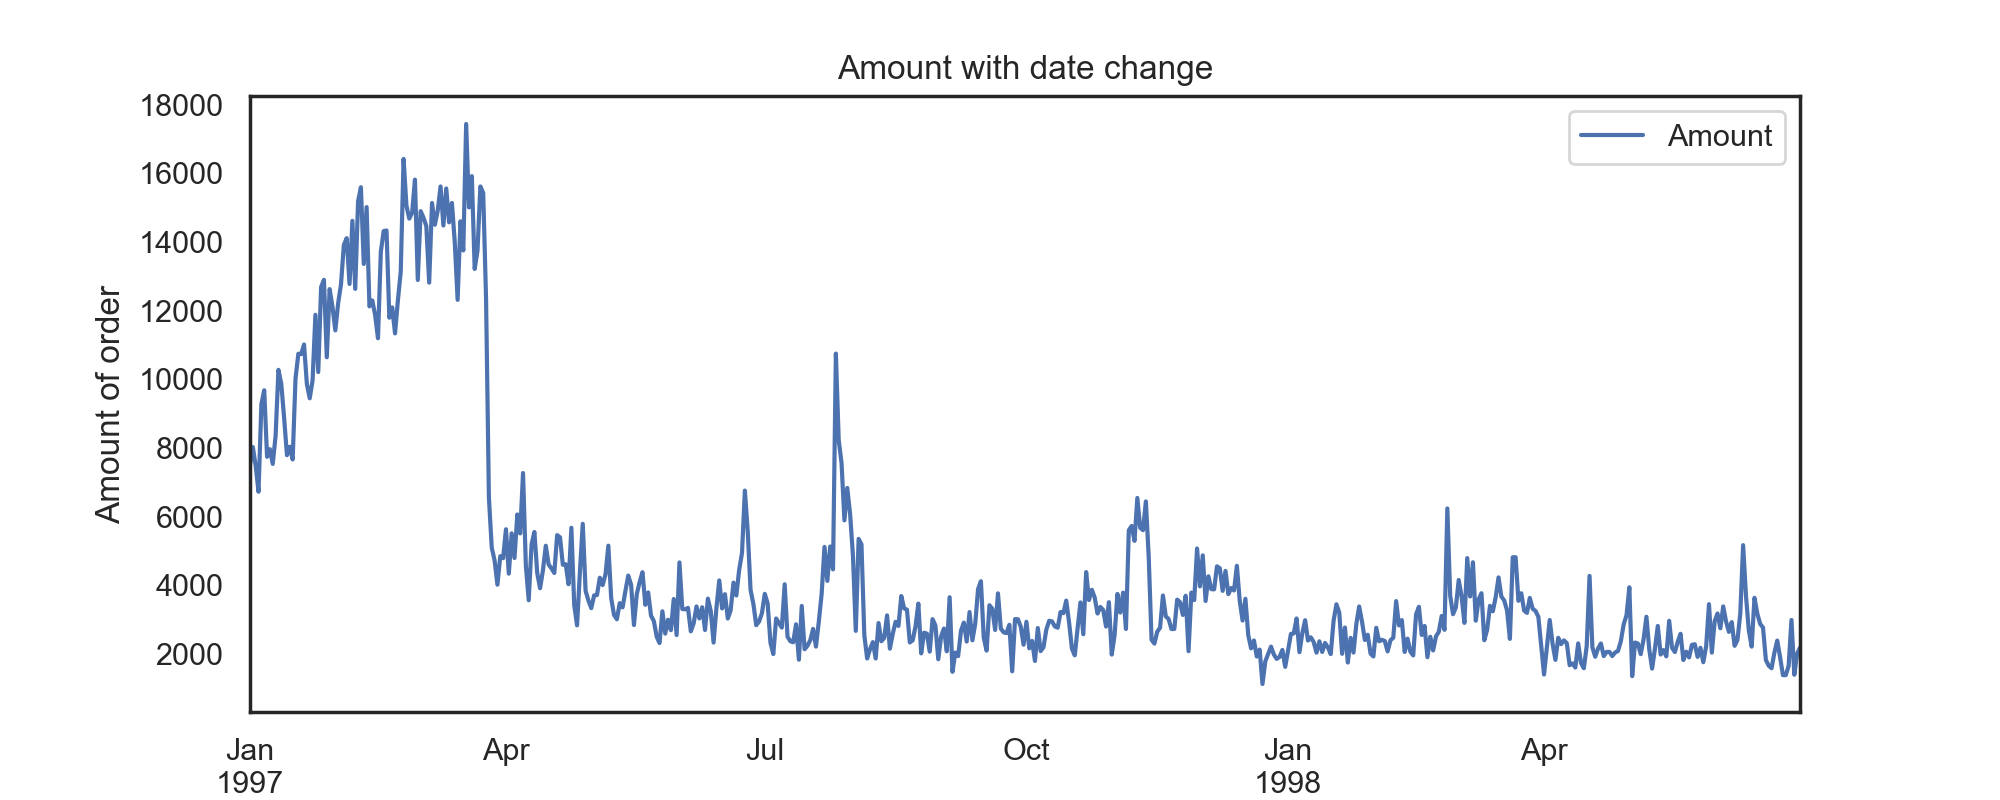

In [55]:
# 可视化
df_amount.set_index('Order_Date').plot(figsize=(10,4))
plt.title("Amount with date change")
plt.ylabel("Amount of order")
plt.show()

#### 分析：

订单金额在 `1997-01 到 1997-04` 总体呈`上升`趋势，订单金额 `较高`

订单金额在`1997-04`呈峭壁式下滑

之后，订单金额有`小幅度波动`，但基本稳定在`4000$/天`

### 3.2.3 异常值检测

主要检查`0元订单`和`极值订单`

In [144]:
# 检查0元订单
zero = Data[(Data.Amount == 0)]
zero.drop('ID', axis=1).describe()

,Quantity,Amount
count,80.0,80.0
mean,1.0,0.0
std,0.0,0.0
min,1.0,0.0
25%,1.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,0.0


#### 分析：

0$订单总计：`80`，所有0元订单的订单数量为`1`

由于0元订单可能是用户取消的订单，对商品分析潜在用处不大，之后的分析中将`剔除0$订单`

In [203]:
# 剔除0元订单
index = zero.index
newData = Data.drop(index=index)
print("Data shape without 0$ purchase: ", newData.shape[0])

Data shape without 0$ purchase:  69579


In [149]:
# 检查极值订单
print("订单金额与数量的相关系数为：", newData.Amount.corr(Data.Quantity))

订单金额与数量的相关系数为： 0.9014193979058273


<IPython.core.display.Javascript object>


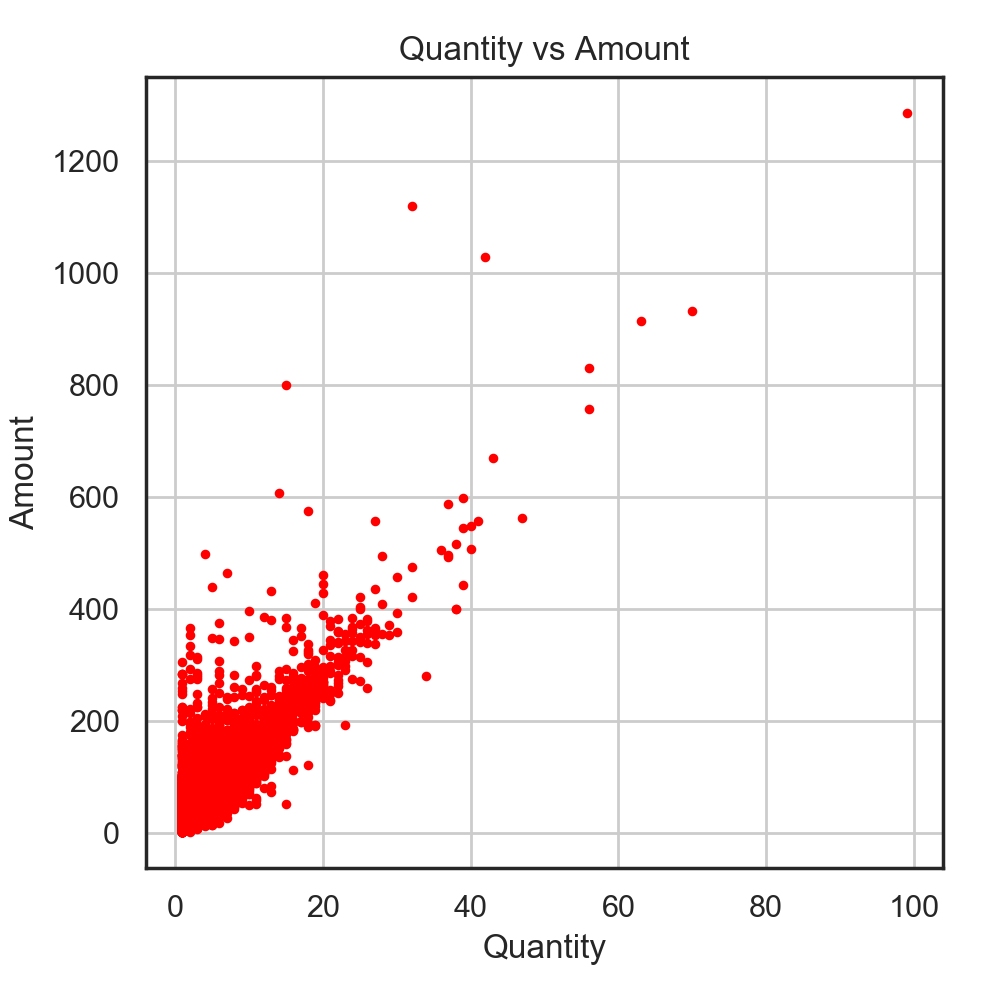

In [150]:
# 可视化
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title("Quantity vs Amount")
plt.xlabel("Quantity")
plt.ylabel("Amount")
plt.tight_layout()
ax.scatter(x=newData.Quantity, y=newData.Amount, color='red', s=6)
plt.grid()
plt.show()

In [107]:
# 异常值提取
extre = Data[(Data.Amount > Data.Quantity*100)]
extre.drop('ID', axis=1).describe()

,Quantity,Amount
count,80.000000,80.000000
mean,1.187500,179.679625
std,0.529957,79.305260
min,1.000000,103.990000
25%,1.000000,122.370000
50%,1.000000,149.990000
75%,1.000000,220.412500
max,4.000000,498.480000


#### 分析：

订单金额与订单数量基本呈`线性关系`，存在部分异常极值

---

## 四. 用户消费行为分析

将从行为静态和行为动态两方面，对用户消费行为进行分析

### 4.1 用户消费行为静态分析

从各用户`购买数量`、`购买金额`、`购买次数`三方面入手，分析用户消费行为

* ### 4.1.1 各用户购买数量分析

 #### _1. 累积购买数量分析_

In [218]:
# 整合用户消费信息
df_customer_quantity = pd.DataFrame(newData.groupby(['ID'])['Quantity'].sum())
df_customer_quantity.reset_index()
df_customer_quantity[:10]

,Quantity
ID,
1,1
2,6
3,16
4,7
5,29
6,1
7,18
8,18
9,6


In [219]:
df_customer_quantity.describe()

,Quantity
count,23502.000000
mean,7.139860
std,17.004818
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,1033.000000


#### 分析：

每位用户平均购买`7个`产品, 标准差为`17.00`，用户购买数量`差异较大`

用户最多购买数量为`1033` --- ps:老有钱了

<IPython.core.display.Javascript object>


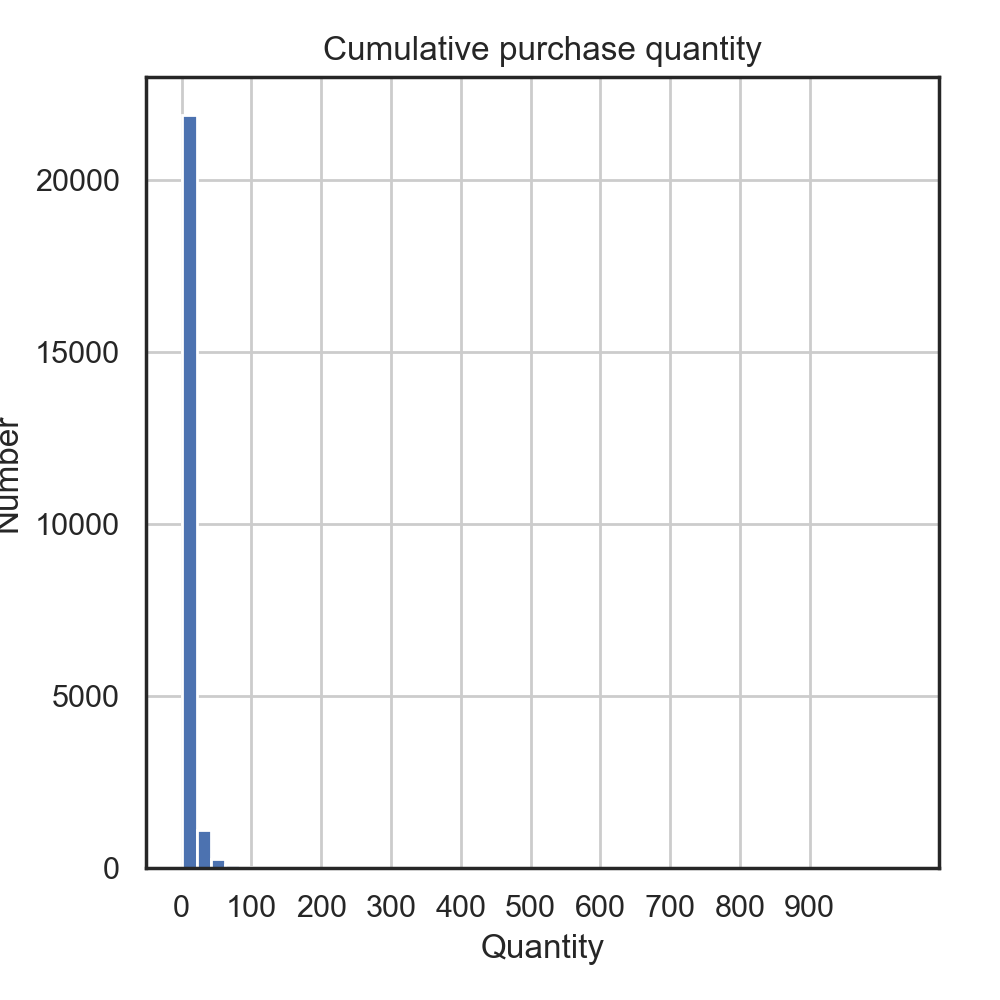

In [153]:
# 累积数量可视化
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Cumulative purchase quantity")
plt.xlabel("Quantity")
plt.ylabel("Number")
plt.xticks(np.arange(0, 1000, 100))
plt.tight_layout()
df_customer_quantity.Quantity.hist(bins=50)

#### _2. 购买数量累积贡献分析_ 

根据购买数量对数据排序，观察用户数量对购买数量影响

In [166]:
# 根据购买数量，由小到大对用户排序
df_sort_quantity = df_customer_quantity.sort_values("Quantity")
df_sort_quantity.reset_index()
df_sort_quantity[:5]

,Quantity
ID,
1,1
8195,1
8196,1
8200,1
8201,1


In [187]:
# 累积购买数量除以总量，得到购买数量贡献
df_cum_quantity = df_sort_quantity.cumsum() 
df_cum_quantity /= df_cum_quantity.Quantity.max()
df_cum_quantity.index = np.arange(1,df_cum_quantity.shape[0]+1)
df_cum_quantity.index.name="Number of customer"
df_cum_quantity[:5]

,Quantity
Number of customer,
1,0.000006
2,0.000012
3,0.000018
4,0.000024
5,0.000030


Number of customer:  23502


<IPython.core.display.Javascript object>


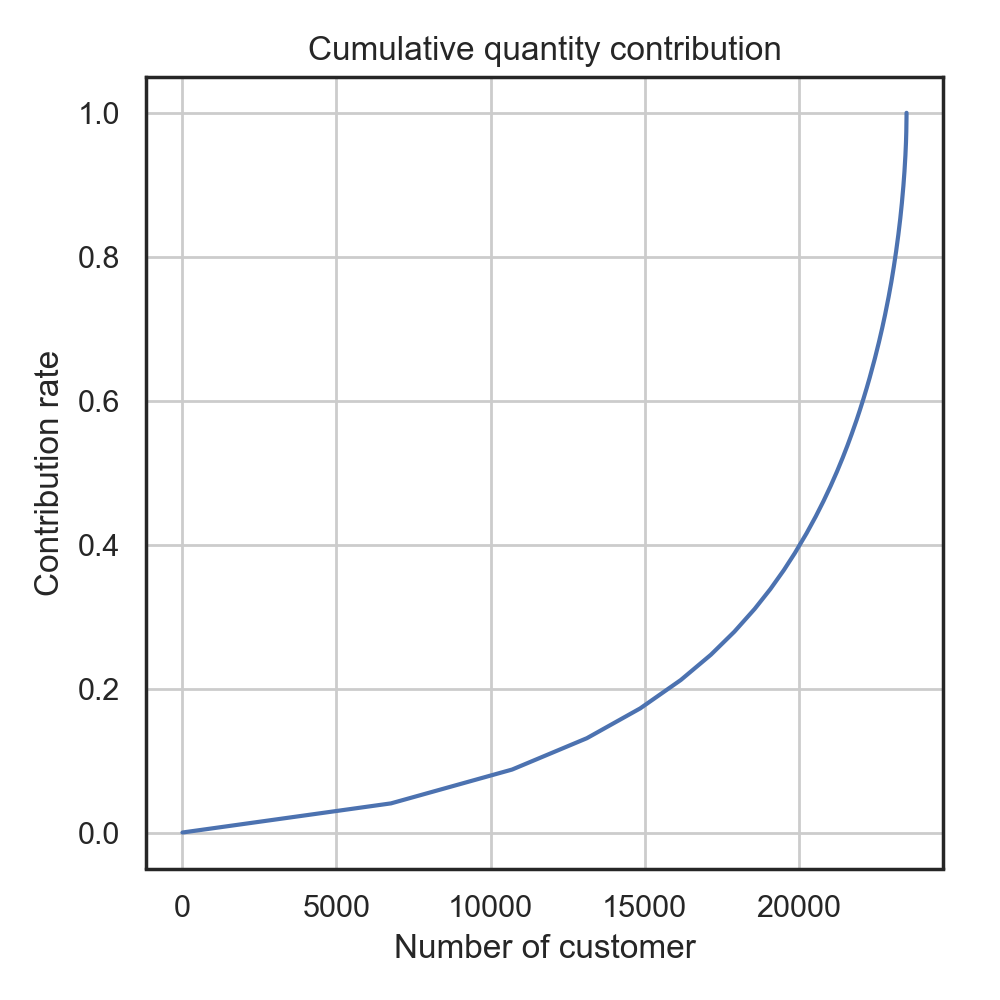

In [189]:
# 可视化
print("Number of customer: ", df_cum_quantity.shape[0])
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Cumulative quantity contribution")
plt.xlabel("Number of customer")
plt.ylabel("Contribution rate")
plt.tight_layout()
plt.plot(df_cum_quantity.Quantity)
plt.grid()
plt.show()

#### 分析：

商品购买数量与用户数量呈`指数型上升关系`

`20000名用户`贡献了`40%`的商品数量，`3502名用户`贡献了`60%`的商品数量

商品销售主要还是靠`少部分` `有意愿购买商品`的用户支撑

#### _3. 最大单笔购买数量分析_ 

In [197]:
# 查看每个用户最大购买数量
df_max_quantity = pd.DataFrame(newData.groupby("ID")["Quantity"].max())
df_max_quantity[:5]

,Quantity
ID,
1,1
2,5
3,5
4,2
5,4


In [198]:
df_max_quantity.describe()

,Quantity
count,23502.000000
mean,2.859757
std,2.946856
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,99.000000


#### 分析：

每位用户最大单笔数量平均为`2.86`

各用户最大单笔数量最小值为`1`， 最大值为`99`

* ### 4.1.2 各用户购买金额分析

 #### _1. 累积购买金额分析_

In [204]:
# 整合用户消费信息
df_customer_amount = pd.DataFrame(newData.groupby(['ID'])['Amount'].sum())
df_customer_amount.reset_index()
df_customer_amount[:5]

,Amount
ID,
1,11.77
2,89.00
3,156.46
4,100.50
5,385.61


In [205]:
df_customer_amount.describe()

,Amount
count,23502.000000
mean,106.387356
std,241.205819
min,3.990000
25%,19.990000
50%,43.600000
75%,106.967500
max,13990.930000


#### 分析：

每位用户平均花费`106.39$`, 标准差为`241.20`，用户累积购买金额`差异很大`

用户最少花费：`3.99$`, 最多花费为`13990.93$` --- pps:真的是老有钱了

 #### _2. 购买金额累积贡献分析_

In [226]:
# 根据购买金额对用户进行排序
df_sort_amount = df_customer_amount.sort_values("Amount")
df_sort_amount.reset_index()
df_sort_amount[:5]

Number of customer,Amount
ID,
16115,3.99
12752,3.99
16185,3.99
12682,3.99
11442,3.99


In [227]:
# 累积购买金额除以总金额，得到购买金额贡献
df_cum_amount = df_sort_amount.cumsum() 
df_cum_amount /= df_cum_amount.Amount.max()
df_cum_amount.index = np.arange(1,df_cum_amount.shape[0]+1)
df_cum_amount.reset_index()
df_cum_amount[:5]

Number of customer,Amount
1,0.000002
2,0.000003
3,0.000005
4,0.000006
5,0.000008


Number of customer:  23502


<IPython.core.display.Javascript object>


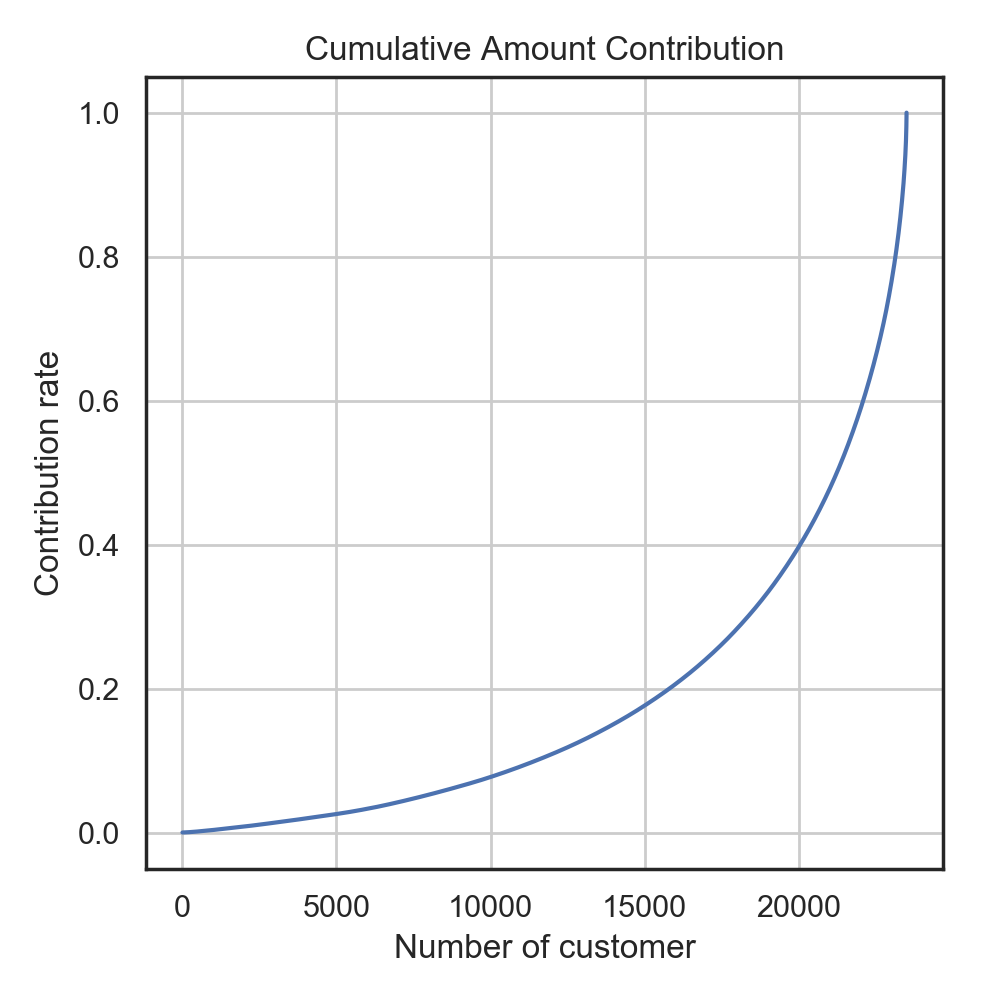

In [228]:
# 可视化
print("Number of customer: ", df_cum_amount.shape[0])
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Cumulative Amount Contribution")
plt.xlabel("Number of customer")
plt.ylabel("Contribution rate")
plt.tight_layout()
plt.plot(df_cum_amount.Amount)
plt.grid()
plt.show()

#### 分析：

商品购买金额与用户数量呈`指数型上升关系`

`20000名用户`贡献了`40%`的商品消费金额，`3502名用户`贡献了`60%`的商品消费金额

商品消费主要还是靠`少部分` `有意愿购买商品`的用户支撑

 #### _3. 最大单笔消费金额分析_

In [229]:
# 查看每个用户最大消费金额
df_max_amount = pd.DataFrame(newData.groupby("ID")["Amount"].max())
df_max_amount[:5]

,Amount
ID,
1,11.77
2,77.00
3,57.45
4,29.73
5,46.46


In [230]:
df_max_amount.describe()

,Amount
count,23502.000000
mean,44.024944
std,46.160066
min,3.990000
25%,15.490000
50%,29.980000
75%,54.770000
max,1286.010000


#### 分析：

每位用户最大单笔消费平均为`44.02$`

各用户最大单笔数量最小值为`3.99$`， 最大值为`1286.01$`

* ### 4.1.3 各用户购买次数分析

In [292]:
df_frequency = newData["ID"].value_counts()
df_frequency[:10]

14048    217
7592     201
7983     149
22061    143
3049     117
499      110
19597    109
7145     102
2484      80
10079     67
Name: ID, dtype: int64

In [233]:
df_frequency.describe()

count    23502.000000
mean         2.960557
std          4.741972
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        217.000000
Name: ID, dtype: float64

#### 分析：

用户平均购买`3次`, 最多购买`217次`

In [291]:
# 用户购买次数分布
df_fre = pd.DataFrame(df_frequency.value_counts())
df_fre['rate'] = df_fre / df_fre.sum()
df_fre[:10]


,ID,rate
1,11843,0.503915
2,4079,0.173560
3,2215,0.094247
4,1440,0.061271
5,995,0.042337
6,637,0.027104
7,473,0.020126
8,393,0.016722
9,273,0.011616
10,204,0.008680


#### 分析：

`50%`的用户只购买一次产品，`75%`用户购买次数为`1～3次`

### 4.2 用户消费行为动态分析

从各用户`购买时间`、`消费间隔`、`生命周期`、`平均购买周期`等方面入手，分析用户消费行为

* ### 4.2.1 各用户第一次购买时间分析

我们可将用户第一次购买定义为：`新用户首次入驻`，分析`新用户购买时间`和`集中产生新用户时间`

 #### _1. 新用户购买时间_

In [388]:
# 选取时间最小值
df_date_first = pd.DataFrame(newData.groupby("ID")['Order_Date'].min())
df_date_first[:5]

,Order_Date
ID,
1,1997-01-01
2,1997-01-12
3,1997-01-02
4,1997-01-01
5,1997-01-01


In [389]:
df_date_first.describe()

,Order_Date
count,23502
unique,86
top,1997-02-08 00:00:00
freq,360
first,1997-01-01 00:00:00
last,1997-11-23 00:00:00


#### 分析：

用户第一次购买时间最早在`1997-01-01`, 最晚在`1997-11-23`

 #### _2. 产生新用户时间_

In [363]:
# 查看每天用户第一次购买时间次数
df_date_fre = df_date_first['Order_Date'].value_counts()
df_date_fre[:5]

1997-02-08    360
1997-02-06    346
1997-02-24    345
1997-02-04    345
1997-03-04    339
Name: Order_Date, dtype: int64

<IPython.core.display.Javascript object>


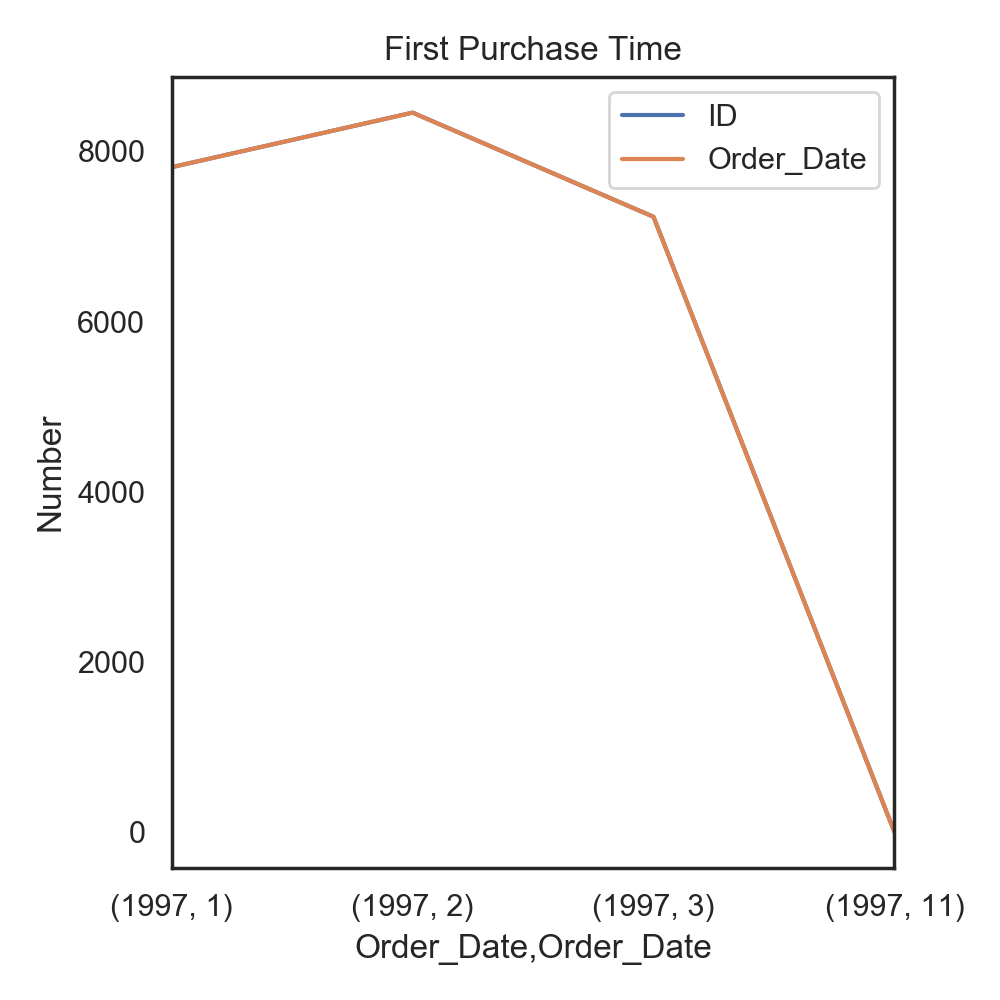

In [362]:
# 根据月份统计第一次购买次数，并可视化
ax = df_date.groupby([df_date_first.Order_Date.dt.year,df_date_first.Order_Date.dt.month]).count().plot()
ax.set_title("First Purchase Time")
ax.set_ylabel("Number")
plt.tight_layout()

#### 分析：

各用户第一次购买累积次数在`1997-02`达到`最大值`, 即新用户此时最多

各用户第一次购买在`1997-01 至 1997-03`较为频繁，而后`逐渐衰减`，在`1997-11`之后`不再有新用户购买`

* ### 4.2.2 各用户最后一次购买时间分析

In [390]:
# 选取时间最大值
df_date_last = pd.DataFrame(newData.groupby("ID")['Order_Date'].max())
df_date_last[:5]

,Order_Date
ID,
1,1997-01-01
2,1997-01-12
3,1998-05-28
4,1997-12-12
5,1998-01-03


In [391]:
df_date_last.describe()

,Order_Date
count,23502
unique,546
top,1997-02-08 00:00:00
freq,219
first,1997-01-01 00:00:00
last,1998-06-30 00:00:00


#### 分析：

用户最后一次购买时间最早在`1997-01-01`，最晚在`1998-06-30`

In [373]:
# 查看每天用户最后一次购买时间次数
df_date_fre = df_date_last['Order_Date'].value_counts()
df_date_fre[:5]

1997-02-08    219
1997-03-12    212
1997-02-04    209
1997-03-06    204
1997-02-10    201
Name: Order_Date, dtype: int64

<IPython.core.display.Javascript object>


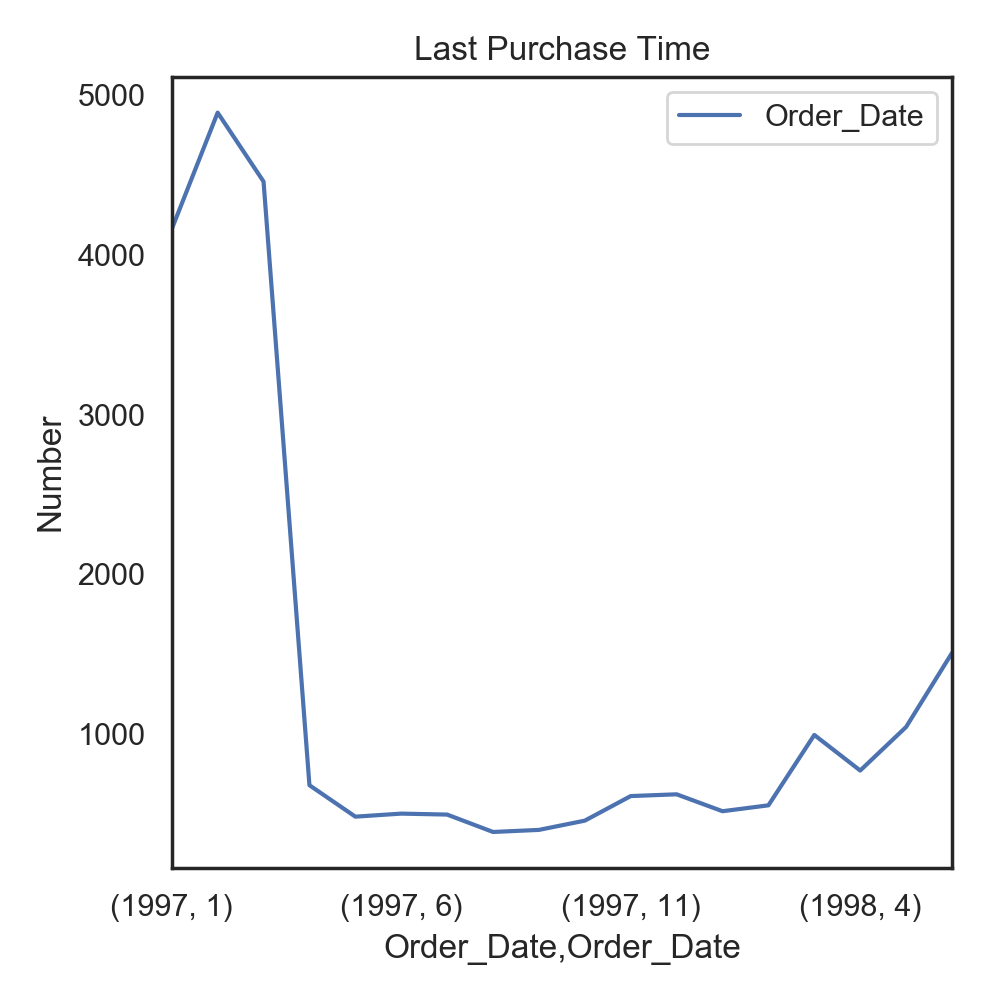

In [374]:
# 根据月份统计最后一次购买次数，并可视化
ax = df_date.groupby([df_date_last.Order_Date.dt.year,df_date_last.Order_Date.dt.month]).count().plot()
ax.set_title("Last Purchase Time")
ax.set_ylabel("Number")
plt.tight_layout()

#### 分析:

用户最后一次购买在`1997年初`达到最高，随后呈`峭壁式下滑`

之后，用户消费`趋于稳定`，每月消费次数`略低于1000`

* ### 4.2.3 各用户最后一次消费与当前时间间隔

假定当前时间为统计数据的`最后一天`，查看间隔天数

In [392]:
Present_Time = df_date_last.Order_Date.max()
Present_Time

Timestamp('1998-06-30 00:00:00')

In [393]:
df_date_last['interval'] = df_date_last['Order_Date'].max() - df_date_last['Order_Date']
df_date_last[:5]

,Order_Date,interval
ID,,
1,1997-01-01,545 days
2,1997-01-12,534 days
3,1998-05-28,33 days
4,1997-12-12,200 days
5,1998-01-03,178 days


In [394]:
df_date_last.describe()

,interval
count,23502
mean,366 days 19:37:23.451621
std,181 days 07:24:57.950958
min,0 days 00:00:00
25%,206 days 06:00:00
50%,471 days 00:00:00
75%,505 days 00:00:00
max,545 days 00:00:00


#### 分析：

用户最后一次消费与当前时间间隔`平均为366天`, 最大时间间隔为`545天`



<IPython.core.display.Javascript object>


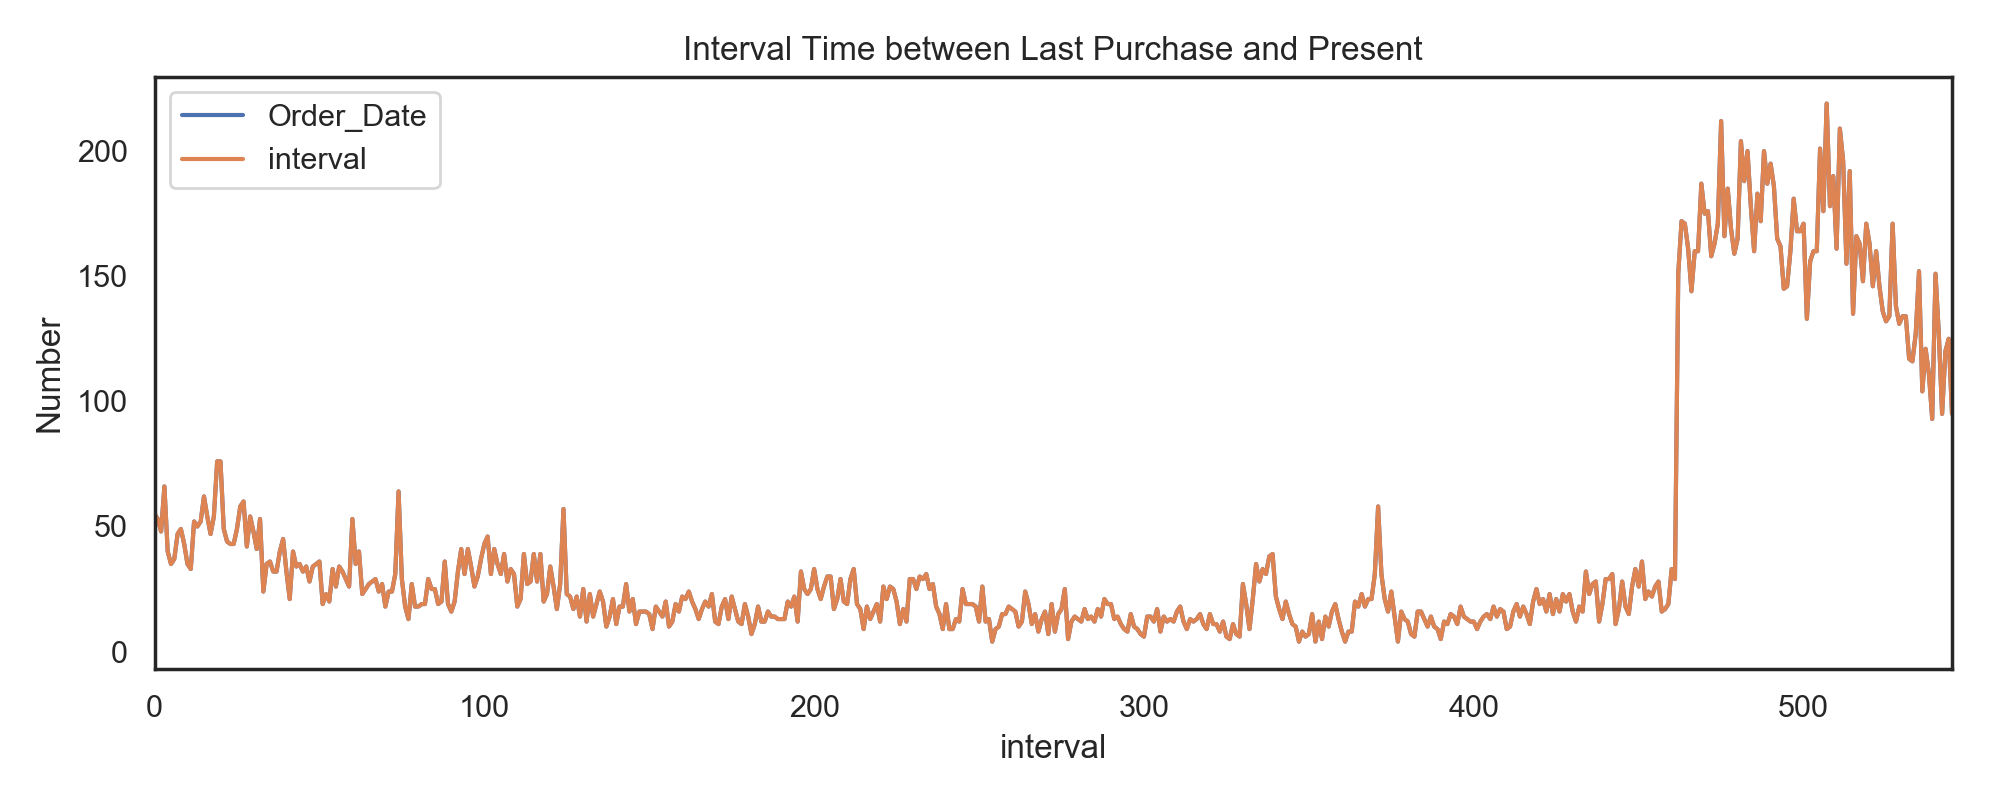

In [387]:
# 可视化
ax = df_date_last.groupby([df_date_last.interval.dt.days]).count().plot(figsize=(10,4))
ax.set_title("Interval Time between Last Purchase and Present")
ax.set_ylabel("Number")
plt.tight_layout()

#### 分析：

大部分用户最后一次消费与当前时间间隔在`500天左右`，即`16个月`左右

我们假定`时隔一年未消费`的用户为`流失用户`，可见公司`流失用户较多`

* ### 4.2.4 各用户生命周期分析

生命周期：通俗地理解为“从摇篮到坟墓”（Cradle-to-Grave）的整个过程

这里，我们定义为用户最后一次消费和第一次消费的时间间隔

In [407]:
df_cycle = pd.DataFrame(df_date_last.Order_Date - df_date_first.Order_Date)
df_cycle[:5]

,Order_Date
ID,
1,0 days
2,0 days
3,511 days
4,345 days
5,367 days


In [408]:
df_cycle.describe()

,Order_Date
count,23502
mean,135 days 05:35:57.058973
std,180 days 16:31:20.822199
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:00
75%,295 days 00:00:00
max,544 days 00:00:00


In [449]:
# 生命周期分布
cnt_interval = df_cycle['Order_Date'].value_counts()
cnt_interval_percent = cnt_interval / cnt_interval.sum()
cnt_inter = pd.concat([cnt_interval, cnt_interval_percent], axis=1)
cnt_inter[:10]

,Order_Date,Order_Date
0 days,11989,0.510127
1 days,76,0.003234
7 days,65,0.002766
8 days,56,0.002383
13 days,54,0.002298
6 days,54,0.002298
5 days,52,0.002213
2 days,51,0.002170
479 days,48,0.002042
11 days,47,0.002000


In [447]:
cnt_inter.describe()

,Order_Date,Order_Date
count,545.000000,545.000000
mean,43.122936,0.001835
std,512.743258,0.021817
min,1.000000,0.000043
25%,15.000000,0.000638
50%,19.000000,0.000808
75%,26.000000,0.001106
max,11989.000000,0.510127


#### 分析：

用户生命周期平均为`135天`, 最大生命周期为`544天`

生命周期为`0天`的用户有`11989人`，占总用户的`51%`，说明大部分用户仅消费一次